In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random

In [ ]:
'''
FONTOS: Az első feladatáltal visszaadott DataFrame-et kell használni a további feladatokhoz. 
A függvényeken belül mindig készíts egy másolatot a bemenő df-ről, (new_df = df.copy() és ezzel dolgozz tovább.)
'''

In [ ]:
'''
Készíts egy függvényt, ami egy string útvonalat vár paraméterként, és egy DataFrame ad visszatérési értékként.

Egy példa a bemenetre: 'test_data.csv'
Egy példa a kimenetre: df_data
return type: pandas.core.frame.DataFrame
függvény neve: csv_to_df
'''

In [5]:
def csv_to_df(location):
    df_data = pd.read_csv(location)
    return df_data

In [ ]:
'''
Készíts egy függvényt, ami egy DataFrame-et vár paraméterként, 
és átalakítja azoknak az oszlopoknak a nevét nagybetűsre amelyiknek neve nem tartalmaz 'e' betüt.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_capitalized
return type: pandas.core.frame.DataFrame
függvény neve: capitalize_columns
'''

In [10]:
def capitalize_columns(df_data):
    new_df = df_data.copy()
    new_column_names = []
    for column_name in new_df.columns:
        if 'e' in column_name:
            new_column_names.append(column_name.upper())
        else:
            new_column_names.append(column_name)
    new_df.columns = new_column_names
    return new_df

In [ ]:
'''
Készíts egy függvényt, ahol egy szám formájában vissza adjuk, hogy hány darab diáknak sikerült teljesíteni a matek vizsgát.
(legyen az átmenő ponthatár 50).

Egy példa a bemenetre: df_data
Egy példa a kimenetre: 5
return type: int
függvény neve: math_passed_count
'''

In [13]:
def math_passed_count(df_data):
    new_df = df_data.copy()

    count = len(new_df[new_df["math score"] > 50])
    return count

850


In [ ]:
'''
Készíts egy függvényt, ahol Dataframe ként vissza adjuk azoknak a diákoknak az adatait (sorokat), akik végeztek előzetes gyakorló kurzust.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_did_pre_course
return type: pandas.core.frame.DataFrame
függvény neve: did_pre_course
'''



In [14]:
def did_pre_course(df_data):
    new_df = df_data.copy()

    filtered_df = new_df[new_df["test preparation course"] == "completed"]
    return filtered_df


     gender race/ethnicity parental level of education         lunch  \
1    female        group C                some college      standard   
6    female        group B                some college      standard   
8      male        group D                 high school  free/reduced   
13     male        group A                some college      standard   
18     male        group C             master's degree  free/reduced   
..      ...            ...                         ...           ...   
990    male        group E                 high school  free/reduced   
991  female        group B            some high school      standard   
995  female        group E             master's degree      standard   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   

    test preparation course  math score  reading score  writing score  
1                 completed          69             90         

In [ ]:
'''
Készíts egy függvényt, ahol a bemeneti Dataframet a diákok szülei végzettségi szintjei alapján csoportosításra kerül,
majd aggregációként vegyük, hogy átlagosan milyen pontszámot értek el a diákok a vizsgákon.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_average_scores
return type: pandas.core.frame.DataFrame
függvény neve: average_scores
'''

In [3]:
def average_scores(df_data):
    new_df = df_data.copy()
    agg_df = new_df.groupby("parental level of education").agg(
            {"math score": "mean", "reading score": "mean", "writing score": "mean"}
        )
    
    return agg_df
    


                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'age' oszloppal, töltsük fel random 18-66 év közötti értékekkel.
A random.randint() függvényt használd, a random sorsolás legyen seedleve, ennek értéke legyen 42.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_age
return type: pandas.core.frame.DataFrame
függvény neve: add_age
'''

In [ ]:
def add_age_column(df_data):
    new_df = df_data.copy()
    random.seed(42)
    new_df["age"] = [random.randint(18, 66) for _ in range(len(new_df))]

    return new_df

In [ ]:
'''
Készíts egy függvényt, ami vissza adja a legjobb teljesítményt elérő női diák pontszámait.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: (99,99,99) #math score, reading score, writing score
return type: tuple
függvény neve: female_top_score
'''

In [5]:
def female_top_score(df_data):
    new_df = df_data.copy()
    female_students = new_df[new_df['gender'] == 'female']
    successful_female_students = female_students.nlargest(1, ['math score', 'reading score', 'writing score'])
    successful_female_student_scores = tuple(successful_female_students.iloc[0][['math score', 'reading score', 'writing score']])
    return successful_female_student_scores




(100, 100, 100)

In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'grade' oszloppal. 
Számoljuk ki hogy a diákok hány százalékot ((math+reading+writing)/300) értek el a vizsgán, és osztályozzuk őket az alábbi szempontok szerint:

90-100%: A
80-90%: B
70-80%: C
60-70%: D
<60%: F

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_grade
return type: pandas.core.frame.DataFrame
függvény neve: add_grade
'''

In [9]:
def add_grade(df_data):
    new_df = df_data.copy()
    new_df['percentage'] = (new_df['math score'] + new_df['reading score'] + new_df['writing score']) / 300 * 100
    new_df['grade'] = pd.cut(new_df['percentage'], bins=[0, 60, 70, 80, 90, 100], labels=['F', 'D', 'C', 'B', 'A'])
    new_df.drop('percentage', axis=1, inplace=True)
    return new_df

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score grade  
0                      none          72             72   

In [ ]:
'''
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan oszlop diagrammot,
ami vizualizálja a nemek által elért átlagos matek pontszámot.

Oszlopdiagram címe legyen: 'Average Math Score by Gender'
Az x tengely címe legyen: 'Gender'
Az y tengely címe legyen: 'Math Score'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: math_bar_plot
'''

In [ ]:
def math_bar_plot(df_data):
    new_df = df_data.copy()
    avg_math_by_gender = new_df.groupby('gender')['math score'].mean()
    fig, ax = plt.subplots()
    ax.bar(avg_math_by_gender.index, avg_math_by_gender.values)

    ax.set_title('Average Math Score by Gender')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Math Score')
    
    return fig

In [ ]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan histogramot,
ami vizualizálja az elért írásbeli pontszámokat.

A histogram címe legyen: 'Distribution of Writing Scores'
Az x tengely címe legyen: 'Writing Score'
Az y tengely címe legyen: 'Number of Students'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: writing_hist
'''

Figure(640x480)


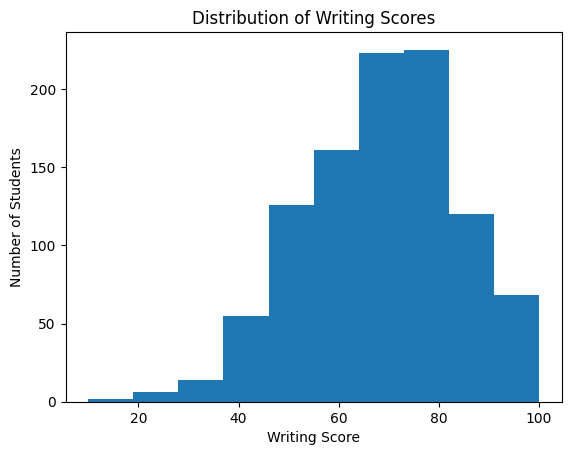

In [6]:
def writing_hist(df_data):
    new_df = df_data.copy()
    fig, ax = plt.subplots()
    ax.hist(new_df['writing score'])
    ax.set_xlabel('Writing Score')
    ax.set_ylabel('Number of Students')
    ax.set_title('Distribution of Writing Scores')
    
    return fig


In [ ]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan kördiagramot,
ami vizualizálja a diákok etnikum csoportok szerinti eloszlását százalékosan.

Érdemes megszámolni a diákok számát, etnikum csoportonként,majd a százalékos kirajzolást az autopct='%1.1f%%' paraméterrel megadható.
Mindegyik kör szelethez tartozzon egy címke, ami a csoport nevét tartalmazza.
A diagram címe legyen: 'Proportion of Students by Race/Ethnicity'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: ethnicity_pie_chart
'''

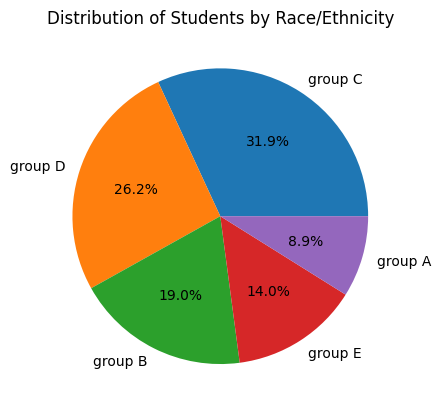

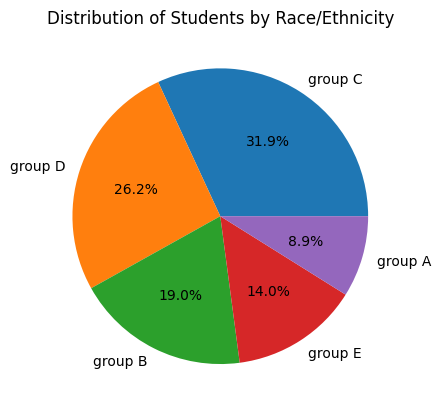

In [15]:
def plot_race_ethnicity_distribution(df_data):
    counts = df_data["race/ethnicity"].value_counts()
    fig, ax = plt.subplots()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.set_title("Proportion of Students by Race/Ethnicity")

    return fig